<a href="https://colab.research.google.com/github/needhruv/Monte-Carlo-for-Finance/blob/main/Generating_Sample_Paths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

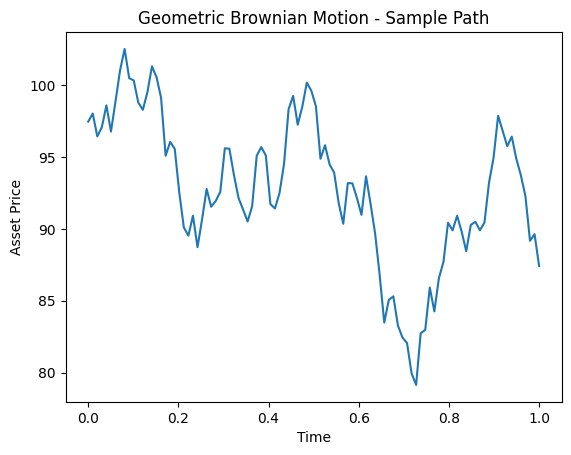

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S0 = 100  # initial asset price
mu = 0.05  # drift (mean return)
sigma = 0.2  # volatility
T = 1  # time horizon
dt = 0.01  # time step
n = int(T / dt)  # number of time steps
t = np.linspace(0, T, n)  # time array

# Simulating the GBM sample path
dW = np.sqrt(dt) * np.random.randn(n)  # increments of Brownian motion
W = np.cumsum(dW)  # cumulative sum to get the Wiener process
S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)  # GBM formula

# Plot the sample path
plt.plot(t, S)
plt.title("Geometric Brownian Motion - Sample Path")
plt.xlabel("Time")
plt.ylabel("Asset Price")
plt.show()


Cholesky Factorization is a technique used to simulate a vector of random variables that follow a multivariate normal distribution.

The Cholesky decomposition becomes particularly useful in Monte Carlo simulations when you need to model correlated random variables across different systems or assets, and you're trying to calculate expected values based on the probability distributions derived from Monte Carlo sampling.

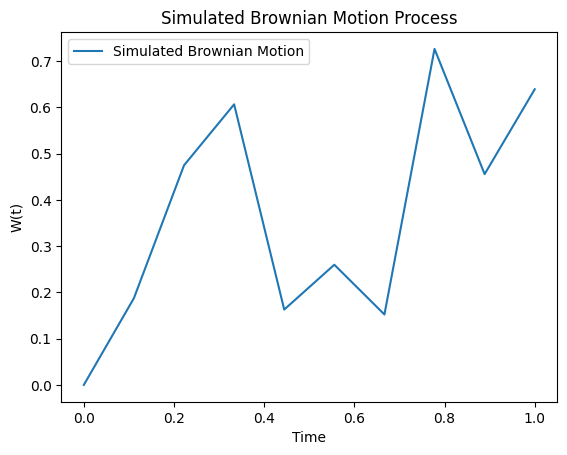

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the time points
n = 10  # Number of time points
t = np.linspace(0, 1, n)  # Time grid from 0 to 1

# Create the covariance matrix C (based on the structure min(ti, tj))
C = np.minimum.outer(t, t)  # Covariance matrix where C[i, j] = min(ti, tj)

# Ensure the matrix is positive definite by adding a small perturbation (diagonal)
C += 1e-10 * np.eye(n)  # Add a small value to diagonal to make the matrix positive definite

# Perform Cholesky factorization to get the lower triangular matrix A
A = np.linalg.cholesky(C)

# Generate a vector of independent standard normal random variables Z
Z = np.random.normal(0, 1, size=n)

# Simulate the Brownian motion process W(t) using W = A * Z
W = A @ Z  # Matrix-vector multiplication

# Plot the result
plt.plot(t, W, label="Simulated Brownian Motion")
plt.title("Simulated Brownian Motion Process")
plt.xlabel("Time")
plt.ylabel("W(t)")
plt.legend()
plt.show()


Brownian Bridge

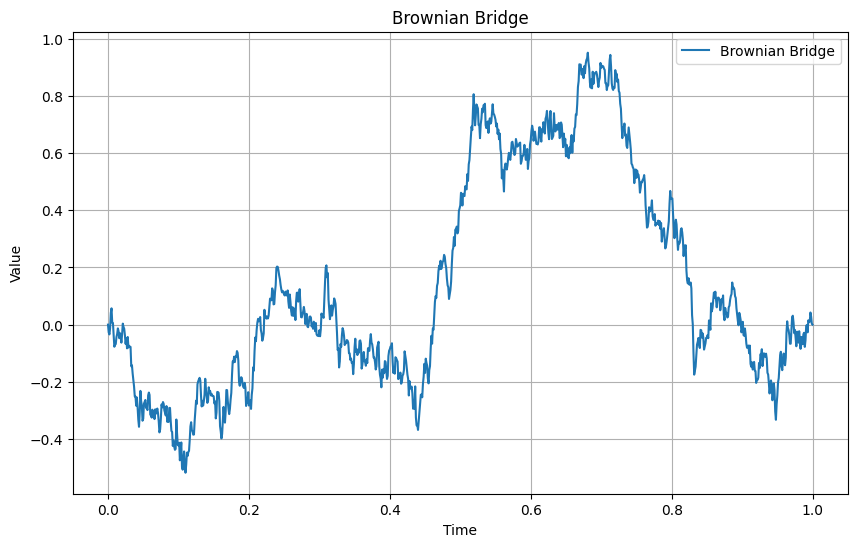

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate Brownian Bridge
def brownian_bridge(T, N, start=0, end=0):
    dt = T / N  # Time step
    t = np.linspace(0, T, N+1)  # Time points
    W = np.random.randn(N)  # Generate standard Brownian motion increments
    W = np.concatenate(([0], np.cumsum(W) * np.sqrt(dt)))  # Simulate the Brownian motion

    # Adjust for the Brownian Bridge
    B = W - (t / T) * (W[-1] - end)  # Subtract the linear drift to ensure endpoint is 'end'

    return t, B

# Parameters
T = 1  # Total time
N = 1000  # Number of steps

# Generate Brownian Bridge
t, B = brownian_bridge(T, N)

# Plotting the Brownian Bridge
plt.figure(figsize=(10, 6))
plt.plot(t, B, label="Brownian Bridge")
plt.title("Brownian Bridge")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.show()
